<a href="https://colab.research.google.com/github/Sheetalp175/CODSOFT_DS/blob/main/CodSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset.csv


Dataset Loaded Successfully!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   


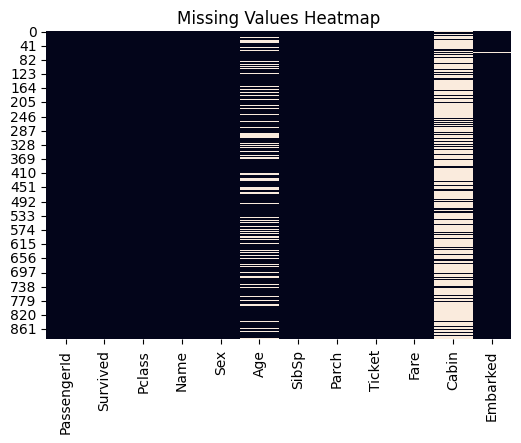

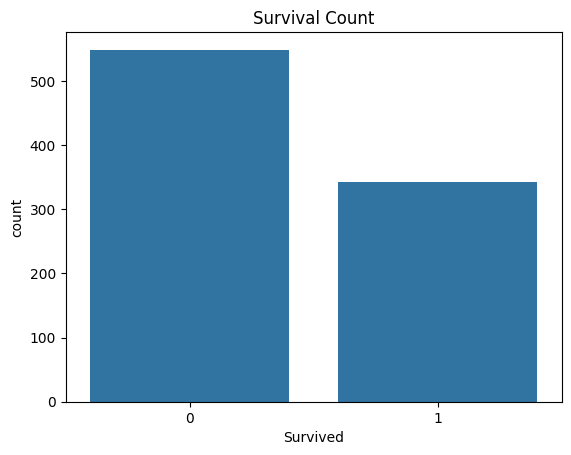

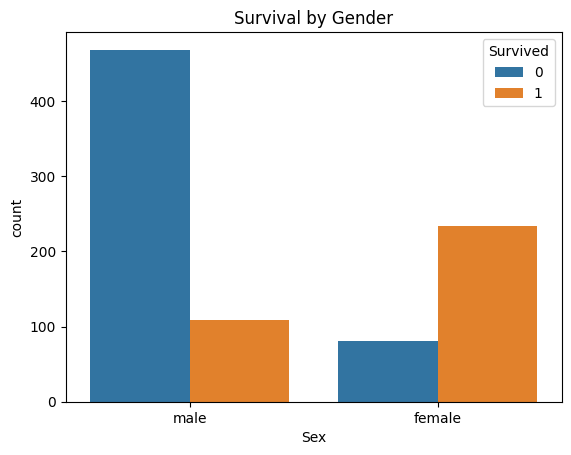

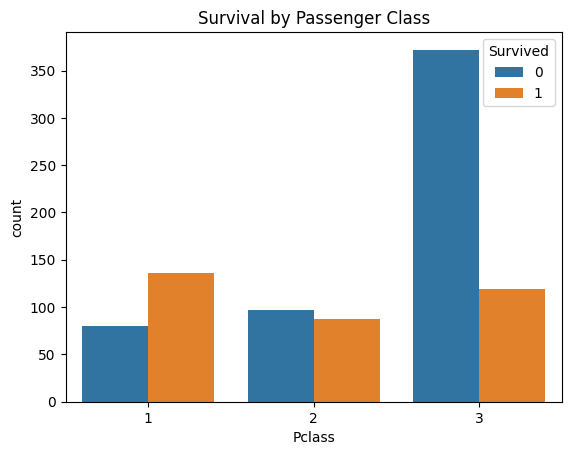

/tmp/ipython-input-4258125088.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
/tmp/ipython-input-4258125088.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



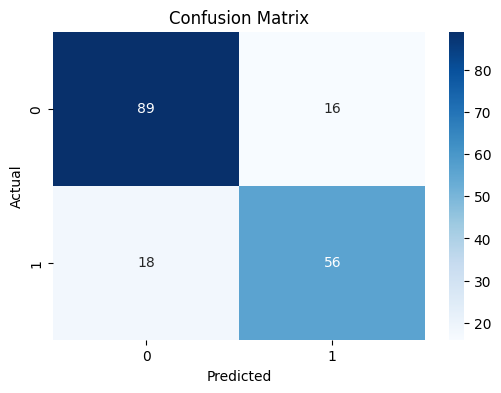

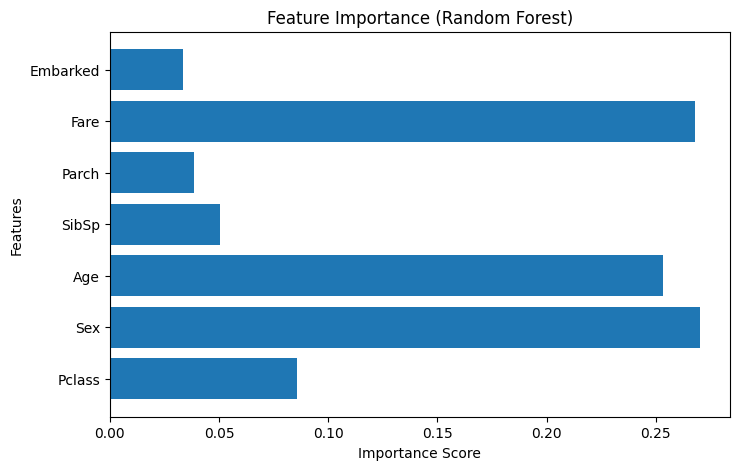

Model Training Completed Successfully!


In [9]:
#TASK1 -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# -------------------------------
# 2. Load Dataset
# -------------------------------
df = pd.read_csv("Titanic-Dataset.csv")
print("Dataset Loaded Successfully!")
df.head()

# -------------------------------
# 3. Basic EDA
# -------------------------------
print(df.info())
print(df.describe())

# Missing values
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

# Count plot of survived
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Gender wise survival
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()

# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

# -------------------------------
# 4. Data Cleaning
# -------------------------------
df = df.drop(["Cabin"], axis=1)   # too many missing values
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Drop name & ticket
df = df.drop(["Name", "Ticket"], axis=1)

# -------------------------------
# 5. Label Encoding Categorical Columns
# -------------------------------
label = LabelEncoder()
df["Sex"] = label.fit_transform(df["Sex"])
df["Embarked"] = label.fit_transform(df["Embarked"])

# -------------------------------
# 6. Prepare Features & Target
# -------------------------------
X = df.drop(["Survived", "PassengerId"], axis=1)
y = df["Survived"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------
# 7. Build Random Forest Model
# -------------------------------
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# -------------------------------
# 8. Accuracy & Classification Report
# -------------------------------
print("Classification Report:")
print(classification_report(y_test, y_pred))

# -------------------------------
# 9. Confusion Matrix Graph
# -------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# -------------------------------
# 10. Feature Importance Graph
# -------------------------------
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(8,5))
plt.barh(features, importances)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

print("Model Training Completed Successfully!")


Please upload your CSV file (IMDb Movies India)


Saving IMDb Movies India.csv to IMDb Movies India (8).csv
Libraries Loaded Successfully!
Dataset Loaded Successfully!
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengu

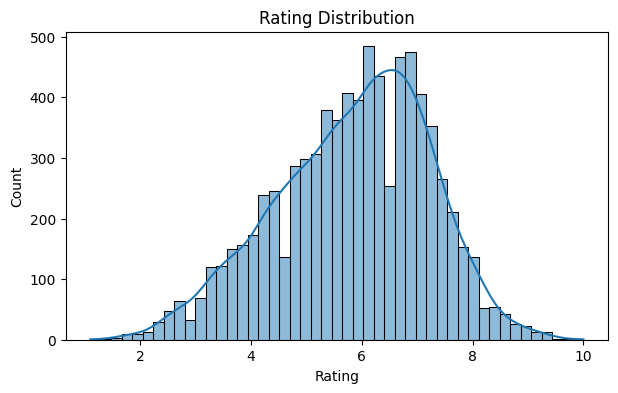

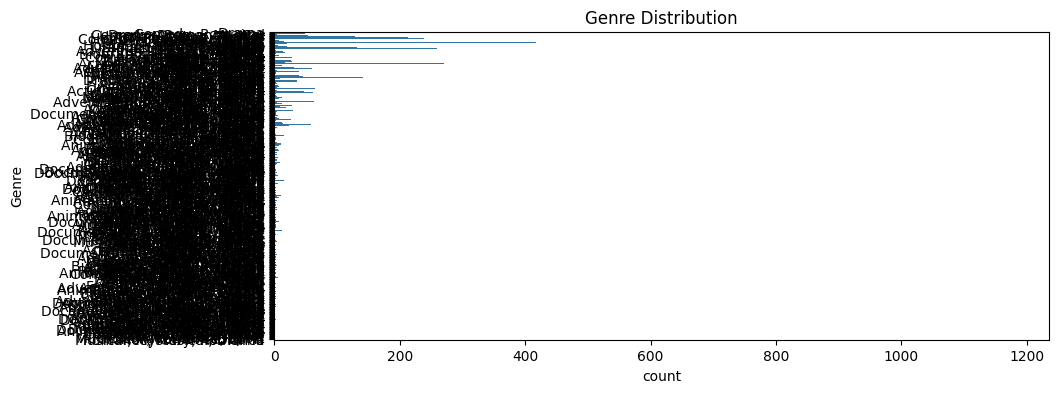


Using Features: ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes', 'Year']

===== LINEAR REGRESSION RESULTS =====
RMSE: 1.301185072658425
R² Score: 0.08932199197531865

===== MODEL COMPARISON TABLE =====
               Model      RMSE  R² Score
0  Linear Regression  1.301185  0.089322
1      Decision Tree  1.575751 -0.335556
2      Random Forest  1.097798  0.351767
3  Gradient Boosting  1.092252  0.358299
4                SVR  1.317367  0.066530


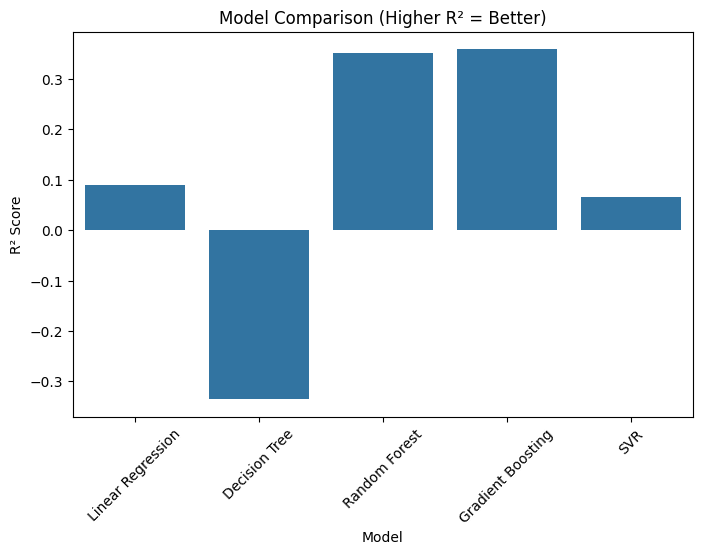


===== BEST RANDOM FOREST PARAMETERS =====
{'max_depth': 30, 'min_samples_split': 10, 'n_estimators': 300}

===== RANDOM FOREST (After Tuning) =====
RMSE: 1.0948757257924384
R² Score: 0.3552128724521101


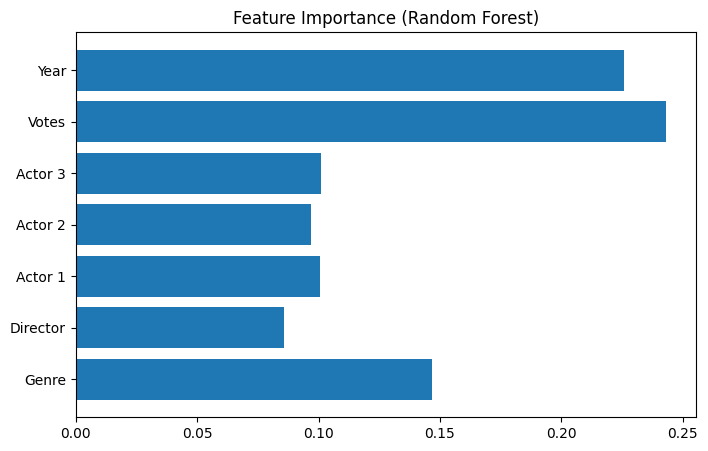

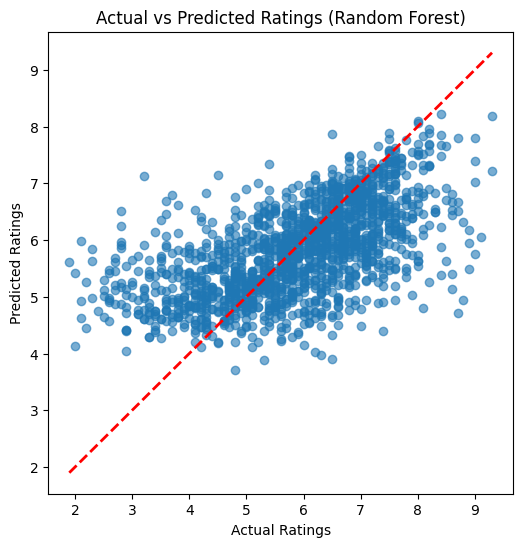


Movie Rating Prediction — All Tasks Completed Successfully!


In [27]:
# =============================================================
# 0. UPLOAD DATASET (FOR GOOGLE COLAB)
# =============================================================
from google.colab import files

print("Please upload your CSV file (IMDb Movies India)")
uploaded = files.upload()  # Select your CSV file

# =============================================================
# 1. IMPORT LIBRARIES
# =============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

print("Libraries Loaded Successfully!")

# =============================================================
# 2. LOAD DATASET (WITH ENCODING FIX)
# =============================================================
csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, encoding="ISO-8859-1")
print("Dataset Loaded Successfully!")
print(df.head())
print("\nColumns:", df.columns)

# =============================================================
# 3. EDA
# =============================================================
print(df.info())
print(df.describe())

# Drop rows with missing target
df = df[df["Rating"].notna()]

# Rating distribution
plt.figure(figsize=(7,4))
sns.histplot(df["Rating"], kde=True)
plt.title("Rating Distribution")
plt.show()

# Genre distribution
if "Genre" in df.columns:
    plt.figure(figsize=(10,4))
    sns.countplot(y=df["Genre"])
    plt.title("Genre Distribution")
    plt.show()

# =============================================================
# 4. CLEANING & PREPROCESSING
# =============================================================
# Fill missing categorical columns
for col in ["Director", "Actor 1", "Actor 2", "Actor 3", "Genre"]:
    if col in df.columns:
        df[col] = df[col].fillna("Unknown")

# Clean 'Year' column (remove parentheses and convert to numeric)
if "Year" in df.columns:
    # Ensure it's string type first to use .str accessor safely
    # Use regex=False for literal string replacement to avoid issues with '(' and ')'
    df["Year"] = df["Year"].astype(str).str.replace("(", "", regex=False).str.replace(")", "", regex=False)
    df["Year"] = pd.to_numeric(df["Year"], errors='coerce') # Coerce errors will turn unparseable values into NaN
    df["Year"] = df["Year"].fillna(df["Year"].median()) # Fill NaNs that might have been created

# Encode categorical columns
label = LabelEncoder()
for col in ["Director", "Actor 1", "Actor 2", "Actor 3", "Genre"]:
    if col in df.columns:
        df[col] = label.fit_transform(df[col])

# Clean Votes column (remove commas & convert to numeric)
if "Votes" in df.columns:
    df["Votes"] = df["Votes"].astype(str).str.replace(",", "")
    df["Votes"] = pd.to_numeric(df["Votes"], errors='coerce').fillna(0)

# =============================================================
# 5. FEATURE SELECTION
# =============================================================
features = []
for col in ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3", "Votes", "Runtime", "Year"]:
    if col in df.columns:
        features.append(col)

X = df[features]
y = df["Rating"]

print("\nUsing Features:", features)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =============================================================
# 6. MODEL 1: LINEAR REGRESSION
# =============================================================
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)

print("\n===== LINEAR REGRESSION RESULTS =====")
print("RMSE:", lr_rmse)
print("R² Score:", lr_r2)

# =============================================================
# 7. MULTIPLE ML MODEL COMPARISON
# =============================================================
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "Gradient Boosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    r2 = r2_score(y_test, pred)
    results.append([name, rmse, r2])

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "R² Score"])
print("\n===== MODEL COMPARISON TABLE =====")
print(results_df)

# Comparison bar plot
plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x="Model", y="R² Score")
plt.title("Model Comparison (Higher R² = Better)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()

# =============================================================
# 8. HYPERPARAMETER TUNING (GridSearchCV) — Random Forest
# =============================================================
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10]
}

rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

print("\n===== BEST RANDOM FOREST PARAMETERS =====")
print(grid.best_params_)

# Predictions with best model
best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

best_rmse = np.sqrt(mean_squared_error(y_test, best_pred))
best_r2 = r2_score(y_test, best_pred)

print("\n===== RANDOM FOREST (After Tuning) =====")
print("RMSE:", best_rmse)
print("R² Score:", best_r2)

# =============================================================
# 9. FEATURE IMPORTANCE
# =============================================================
plt.figure(figsize=(8,5))
plt.barh(X.columns, best_model.feature_importances_)
plt.title("Feature Importance (Random Forest)")
plt.show()

# =============================================================
# 10. ACTUAL VS PREDICTED SCATTER PLOT
# =============================================================
plt.figure(figsize=(6,6))
plt.scatter(y_test, best_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Ratings (Random Forest)")
plt.show()

print("\nMovie Rating Prediction — All Tasks Completed Successfully!")

In [ ]:
##TASK3....


# =============================================================
# 0. UPLOAD DATASET (FOR GOOGLE COLAB)
# =============================================================
from google.colab import files
print("Please upload 'Iris.csv'")
uploaded = files.upload()  # Select your CSV file

# =============================================================
# 1. IMPORT LIBRARIES
# =============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

print("Libraries Loaded Successfully!")

# =============================================================
# 2. LOAD DATASET
# =============================================================
csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(IRIS.csv)
print("Dataset Loaded Successfully!\n")
print(df.head())
print("\nColumns:", df.columns)

# =============================================================
# 3. EDA
# =============================================================
print(df.info())
print(df.describe())

# Pairplot by species
sns.pairplot(df, hue="Species")
plt.show()

# Countplot of species
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Species")
plt.title("Species Count")
plt.show()

# =============================================================
# 4. PREPROCESSING
# =============================================================
# Encode species
label = LabelEncoder()
df["Species"] = label.fit_transform(df["Species"])

# Features and target
X = df.drop(columns=["Species"])
y = df["Species"]

# =============================================================
# 5. TRAIN-TEST SPLIT
# =============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =============================================================
# 6. MODEL 1: LOGISTIC REGRESSION
# =============================================================
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("\n===== LOGISTIC REGRESSION RESULTS =====")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=label.classes_)
disp_lr.plot(cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# =============================================================
# 7. MODEL 2: RANDOM FOREST
# =============================================================
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n===== RANDOM FOREST RESULTS =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=label.classes_)
disp_rf.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Feature importance
plt.figure(figsize=(8,5))
plt.barh(X.columns, rf.feature_importances_)
plt.title("Feature Importance (Random Forest)")
plt.show()

print("\nIris Classification Completed Successfully!")


Please upload 'Iris.csv'
